# Bem Vindos a Analise usando Machine Learning

No decorrer das análises anteriores, concentramos nossa atenção nos dados históricos. Agora, estamos prestes a adentrar a dimensão do futuro e tentar projetar possíveis cenários com base nas informações contidas nos três primeiros conjuntos de dados. O que podemos antever a partir desses dados? Vamos explorar essa perspectiva de previsão e compreender quais insights eles podem nos proporcionar.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import os

In [38]:
# Inserindo tabela
data = pd.read_csv('Tabelas/amostras_df.csv', parse_dates=['Data da Coleta'])
data.set_index('Data da Coleta', inplace=True)
data.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira
Data da Coleta,,,,,,,
2012-01-02,NE,BA,FEIRA DE SANTANA,ETANOL,2.050,Litro,COSAN LUBRIFICANTES
2012-01-02,SE,RJ,ITAPERUNA,GASOLINA,2.849,Litro,RAIZEN
2012-01-02,S,PR,CAMPO MOURAO,GASOLINA,2.769,Litro,BRANCA
2012-01-02,N,PA,TUCURUI,DIESEL,2.310,Litro,IPIRANGA
2012-01-02,N,PA,SANTANA DO ARAGUAIA,DIESEL,2.300,Litro,RAIZEN


Vamos fazer essa analise com base nos dias, na nossa base de dados temos varios dias em que foram registradas as vendas, estamos interessados nesses dias, por tanto vamos criar uma coluna apenas contabinilizando os dias, e com base nelas vamos treinar o nosso modelo

In [39]:
# Queremos prever a coluna valor de venda 
target_column = 'Valor de Venda'

# criando a coluna Dias
data['Dias'] = (data.index - data.index[0]).days

Agora vamos dar uma boa olhada nos dados e entender como está funicionando com esse novo sistema

In [40]:
# Plotando tabela
data

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Unidade de Medida,Bandeira,Dias
Data da Coleta,,,,,,,,
2012-01-02,NE,BA,FEIRA DE SANTANA,ETANOL,2.050,Litro,COSAN LUBRIFICANTES,0
2012-01-02,SE,RJ,ITAPERUNA,GASOLINA,2.849,Litro,RAIZEN,0
2012-01-02,S,PR,CAMPO MOURAO,GASOLINA,2.769,Litro,BRANCA,0
2012-01-02,N,PA,TUCURUI,DIESEL,2.310,Litro,IPIRANGA,0
2012-01-02,N,PA,SANTANA DO ARAGUAIA,DIESEL,2.300,Litro,RAIZEN,0
...,...,...,...,...,...,...,...,...
2022-12-30,SE,SP,PIRACICABA,GASOLINA,4.890,Litro,BRANCA,4015
2022-12-30,S,SC,BLUMENAU,ETANOL,4.290,Litro,IPIRANGA,4015
2022-12-30,SE,SP,PIRACICABA,DIESEL,6.590,Litro,BRANCA,4015


Na ultima coluna podemos ver-la, la esta os dias, no dia 0 temos varios registos e no ultimo dia temos tambem varios registros

Agora vamos separar os dados para treino e teste e treinar o nosso modela

In [41]:
X = data['Dias'].values.reshape(-1, 1)
y = data[target_column].values

O modelo que escolhi inicialmente foi o modelo de regressão linear, uma abordagem analítica que opera da seguinte maneira: ele busca estabelecer uma relação linear entre uma variável dependente e uma ou mais variáveis independentes, com o objetivo de realizar previsões ou entender o impacto de mudanças nas variáveis independentes sobre a variável dependente.

Nesse modelo, a ideia é traçar uma linha reta que melhor se ajuste aos pontos de dados, minimizando a diferença entre os valores observados e os valores estimados pela linha de regressão. Isso permite criar uma fórmula matemática que expressa essa relação linear, possibilitando a previsão de valores futuros com base nas variáveis independentes.

Caso queira aprofundar-se nesse conceito e entender melhor o funcionamento do modelo de regressão linear, você pode acessar este link: [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Isso proporcionará uma compreensão mais completa sobre como o modelo é aplicado, interpretado e quais são suas limitações e considerações.

In [42]:
# Treinando o modelo
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [43]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
print(f"Erro Médio Quadrático: {mse}")
model.__dict__

Erro Médio Quadrático: 0.5399409418078741


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([0.00086775]),
 'rank_': 1,
 'singular_': array([878324.70244537]),
 'intercept_': 1.852251728654531}

Aqui podemos observar o que seria uma margem de erro, infelizmente em relação a esses dados, não existe uma correlação profunda entre os dados ou um fator determinante ('coef_': array([0.00086775]),)

basicamente temos uma margem de erro de 54%
Obviamente esse não é o melhor modelo para tentar prever o futuro em series temporais mais aqui podemos pelomenos ter uma noção da tendencia que esses dados tem trassando uma reta linear

Vamos ver isso Visualmente

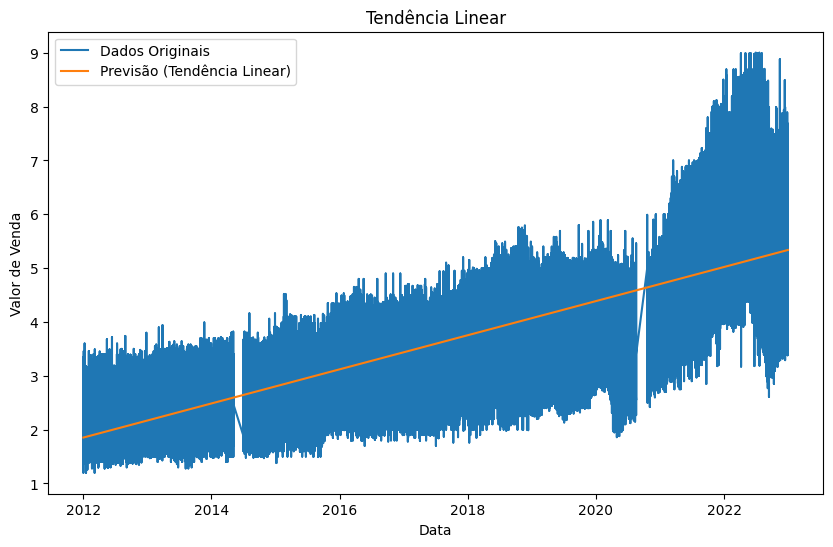

In [44]:
# Verificando e criando pasta para alocar graficos das previsçoes
if not os.path.exists("Graficos_de_previsões"):
    os.makedirs("Graficos_de_previsões")
# Plotando grafico linear em relação ao passado
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(data.index, y_pred, label='Previsão (Tendência Linear)')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title('Tendência Linear')
plt.legend()
plt.savefig("Graficos_de_previsões/Tendência-Linear.png")
plt.show()


O gráfico apresentado fornece uma representação visual das tendências de preço ao longo do tempo, permitindo-nos capturar uma noção da direção em que os preços estão se movendo. Essa visualização é uma ferramenta valiosa para identificar padrões e flutuações ao longo do período analisado.

Agora, estamos prontos para dar um passo adiante e entrar na fase de previsão. Utilizando as informações e insights obtidos até agora, buscaremos estimar valores futuros com base nos padrões observados nos dados históricos. Vamos aplicar métodos analíticos para projetar tendências e padrões no futuro, levando em conta as variações sazonais, fatores econômicos e outros elementos que moldam o comportamento dos preços.

Ao realizarmos essa previsão, devemos estar cientes de que ela é uma projeção baseada em dados passados e que o futuro pode ser influenciado por eventos imprevisíveis. No entanto, a análise e previsão nos proporcionam uma ferramenta valiosa para a tomada de decisões informadas e a compreensão das possíveis direções que os preços dos combustíveis podem seguir.

In [45]:
dias_futuros = np.arange(data['Dias'].max() + 1, data['Dias'].max() + 3650 + 1)
previsao_futura = model.predict(dias_futuros.reshape(-1, 1))

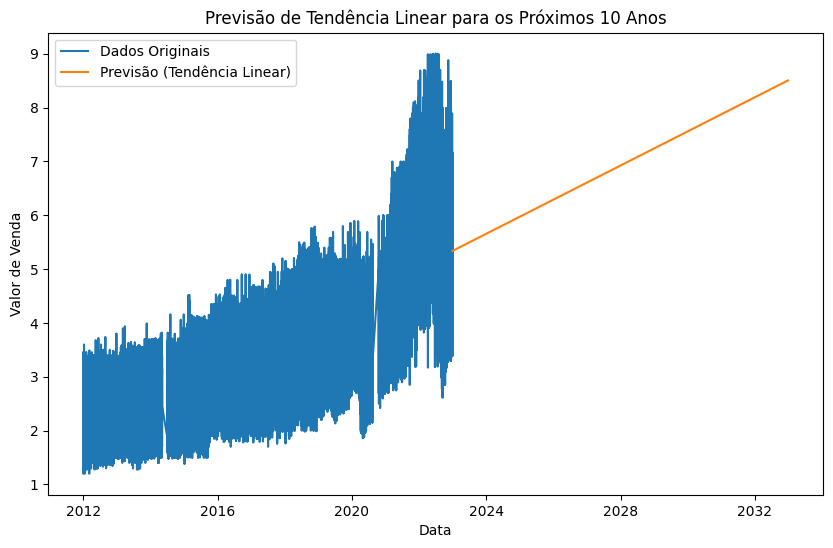

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(pd.date_range(start=data.index[-1], periods=len(previsao_futura), freq='D'), previsao_futura, label='Previsão (Tendência Linear)')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title('Previsão de Tendência Linear para os Próximos 10 Anos')
plt.legend()
plt.savefig("Graficos_de_previsões/Previsão-de-Tendência-Linear-para-os-Próximos-10-Anos.png")
plt.show()

In [47]:
data.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Produto',
       'Valor de Venda', 'Unidade de Medida', 'Bandeira', 'Dias'],
      dtype='object')

# Regressão Polinomial

Vamos agora explorar uma variação do modelo de regressão linear, conhecida como regressão polinomial. Essa abordagem envolve a introdução de termos polinomiais na equação linear, permitindo que o modelo capture relacionamentos não-lineares entre as variáveis independentes e a variável dependente.

Ao introduzir termos polinomiais, como quadráticos ou cúbicos, podemos modelar curvas mais complexas que podem se ajustar melhor aos padrões dos dados. Isso nos dá a flexibilidade de capturar tendências não-lineares, como curvas ascendentes ou descendentes, que podem não ser adequadamente representadas por uma linha reta.

Ao adicionar esse grau de flexibilidade ao nosso modelo de regressão linear, estaremos explorando a possibilidade de melhorar a precisão das previsões, especialmente quando os dados demonstram um comportamento mais complexo. No entanto, também é importante lembrar que a seleção do grau de polinômio deve ser cuidadosa para evitar o overfitting, que ocorre quando o modelo se ajusta em excesso aos dados de treinamento e não generaliza bem para novos dados.

Essa variação na abordagem do modelo de regressão linear com a introdução do grau de polinômio nos permitirá capturar nuances mais sutis nos dados e, assim, melhorar a qualidade das previsões para entender as tendências futuras dos preços dos combustíveis.

In [48]:
grau_polinomio = 2

poly_features = PolynomialFeatures(degree=grau_polinomio)
X_poly = poly_features.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)
model_poly.__dict__

dias_futuros = np.arange(data['Dias'].max() + 1, data['Dias'].max() + 3650 + 1)
dias_futuros_poly = poly_features.transform(dias_futuros.reshape(-1, 1))
previsao_futura_poly = model_poly.predict(dias_futuros_poly)

y_pred_poly = model_poly.predict(X_poly)
emq_poly = mean_squared_error(y, y_pred_poly)

print(f"Erro Médio Quadrático: {emq_poly}")

Erro Médio Quadrático: 0.4438613779989244


In [49]:
# Começaremos com grau 2, Grau 1 seria o equivalente ao resultado anterior com uma reta linear
grau_polinomio = 2

In [50]:
# Definindo o polinomio
poly_features = PolynomialFeatures(degree=grau_polinomio)
X_poly = poly_features.fit_transform(X)

In [51]:
# Treinando modelo Polinomial
model_poly = LinearRegression()
model_poly.fit(X_poly, y)
model_poly.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 3,
 'coef_': array([ 0.00000000e+00, -1.34147116e-04,  2.58085156e-07]),
 'rank_': 2,
 'singular_': array([3.52582270e+09, 2.23580245e+05, 0.00000000e+00]),
 'intercept_': 2.4633244995947448}

In [52]:
dias_futuros = np.arange(data['Dias'].max() + 1, data['Dias'].max() + 3650 + 1)
dias_futuros_poly = poly_features.transform(dias_futuros.reshape(-1, 1))
previsao_futura_poly = model_poly.predict(dias_futuros_poly)

In [53]:
# Verificando margem de erro
y_pred_poly = model_poly.predict(X_poly)
emq_poly = mean_squared_error(y, y_pred_poly)

print(f"Erro Médio Quadrático: {emq_poly}")

Erro Médio Quadrático: 0.4438613779989244


No contexto do nosso estudo, a transição do modelo de regressão linear para o modelo de regressão polinomial resultou em uma notável redução no EMQ, de 54% para 44%. Essa significativa melhoria de 10% aponta para uma adaptação mais acurada do modelo aos dados disponíveis, culminando em previsões mais alinhadas com a realidade.

A importância dessa melhoria ganha vida quando a traduzimos visualmente. Ao representar as previsões e os valores reais em um gráfico comparativo, é possível notar como as linhas de previsão do modelo polinomial se ajustam de forma mais precisa aos pontos reais, particularmente nas áreas onde o modelo linear apresentava maiores desvios.

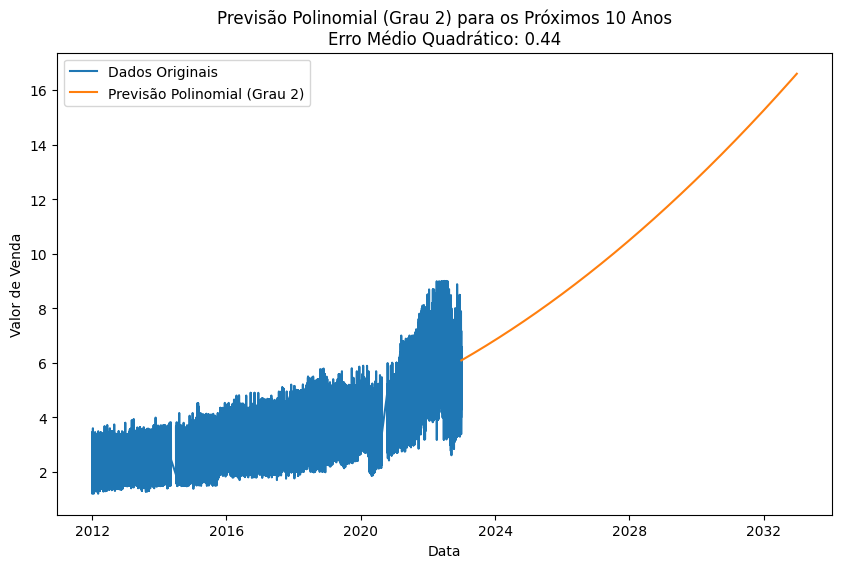

In [54]:

plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(pd.date_range(start=data.index[-1], periods=len(previsao_futura_poly), freq='D'), previsao_futura_poly, label=f'Previsão Polinomial (Grau {grau_polinomio})')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title(f'Previsão Polinomial (Grau {grau_polinomio}) para os Próximos 10 Anos\nErro Médio Quadrático: {emq_poly:.2f}')
plt.legend()
plt.savefig(f"Graficos_de_previsões/'Previsão-Polinomial-(Grau-{grau_polinomio})-para-os-Próximos-10-Anos-Erro-Médio-Quadrático:-{emq_poly:.2f}'.png")
plt.show()


Compreendo a reflexão. A previsão de que os preços dos combustíveis podem alcançar até R$ 16,00 reais o litro até 2022 é uma projeção que, se concretizada, poderia ter um impacto significativo nos consumidores e na economia em geral. No entanto, é importante abordar essa previsão com cautela, considerando diversos fatores:

Influências Externas: Os preços dos combustíveis são influenciados por uma série de fatores externos, incluindo os preços internacionais do petróleo, flutuações cambiais, políticas governamentais, demanda global por energia, entre outros. Prever esses fatores com precisão é um desafio complexo.

Volatilidade dos Mercados: O mercado de energia é notoriamente volátil, com preços que podem ser afetados por eventos geopolíticos, desastres naturais, mudanças nas políticas energéticas e outros eventos imprevisíveis.

Regulamentações: Regulamentações governamentais e políticas públicas relacionadas a impostos, subsídios e regulamentações ambientais também têm um impacto significativo nos preços dos combustíveis.

Tecnologia e Inovação: Avanços tecnológicos e inovações no setor de energia podem alterar a demanda por combustíveis e influenciar os preços.

Mudanças no Comportamento do Consumidor: A adoção de veículos elétricos, por exemplo, pode influenciar a demanda por combustíveis fósseis e, por consequência, os preços.

Diante desses fatores, é prudente considerar que as previsões sobre os preços dos combustíveis devem ser interpretadas como cenários possíveis, mas não certezas. A natureza volátil e multifacetada do mercado de energia torna qualquer previsão um exercício complexo e sujeito a mudanças inesperadas. Portanto, enquanto a projeção de R$ 16,00 reais o litro até 2022 é interessante, é essencial analisá-la no contexto das incertezas inerentes ao setor de energia e da economia em geral.

# Ainda não acabou

Vamos aumentar o grau e ver o que esse modelo ainda pode nos dizer

In [55]:
# Ok, agora vamos aumentar o grau
grau_polinomio = 3

poly_features = PolynomialFeatures(degree=grau_polinomio)
X_poly = poly_features.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)
model_poly.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 4,
 'coef_': array([ 0.00000000e+00,  1.11448231e-03, -5.47299703e-07,  1.36608340e-10]),
 'rank_': 3,
 'singular_': array([1.32142538e+13, 5.97489549e+08, 9.14148226e+04, 0.00000000e+00]),
 'intercept_': 2.0695853317288897}

In [56]:
# Verificando margem de erro do novo modelo com grau 3
dias_futuros = np.arange(data['Dias'].max() + 1, data['Dias'].max() + 3650 + 1)
dias_futuros_poly = poly_features.transform(dias_futuros.reshape(-1, 1))
previsao_futura_poly = model_poly.predict(dias_futuros_poly)

y_pred_poly = model_poly.predict(X_poly)
emq_poly = mean_squared_error(y, y_pred_poly)

print(f"Erro Médio Quadrático: {emq_poly}")

Erro Médio Quadrático: 0.4158475045712975


Com a introdução dessa nova métrica, o Erro Médio Quadrático (EMQ) de 0.4158475045712975, observamos um aprimoramento adicional na qualidade das previsões.

Comparando esse EMQ ao valor anterior, percebemos uma redução na discrepância entre as previsões e os valores reais. Essa melhoria reflete uma maior precisão nas nossas estimativas, proporcionando uma confiança mais sólida nas projeções futuras.

vamos ver o que isso quer dizer no grafico!

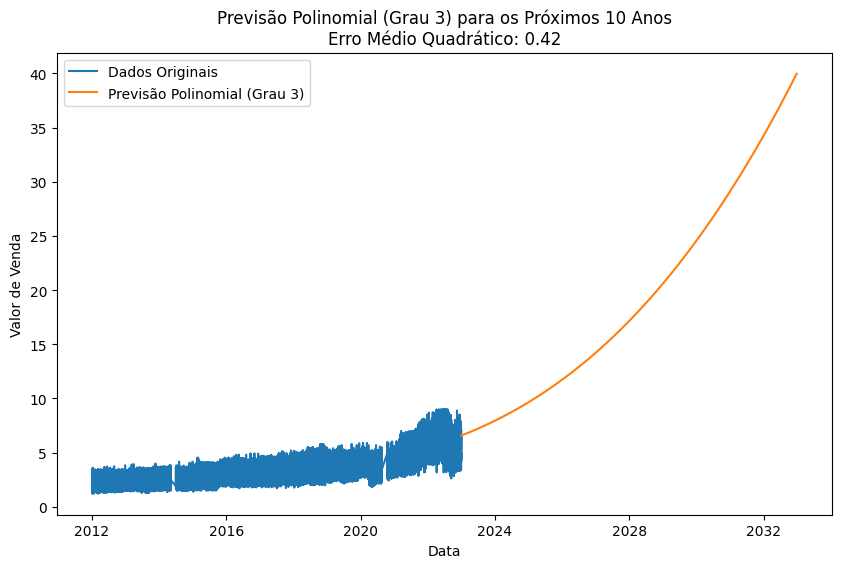

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Dados Originais')
plt.plot(pd.date_range(start=data.index[-1], periods=len(previsao_futura_poly), freq='D'), previsao_futura_poly, label=f'Previsão Polinomial (Grau {grau_polinomio})')
plt.xlabel('Data')
plt.ylabel('Valor de Venda')
plt.title(f'Previsão Polinomial (Grau {grau_polinomio}) para os Próximos 10 Anos\nErro Médio Quadrático: {emq_poly:.2f}')
plt.legend()
plt.savefig(f"Graficos_de_previsões/'Previsão-Polinomial-(Grau-{grau_polinomio})-para-os-Próximos-10-Anos-Erro-Médio-Quadrático:-{emq_poly:.2f}'.png")
plt.show()

Compreendendo a nova métrica de erro e a probabilidade associada, os quais indicam um nível de precisão ainda mais elevado, chegamos a um cenário que apresenta algumas implicações impactantes. Ao observar o gráfico resultante, fica claro que as previsões sobre os preços dos combustíveis não são tão otimistas.

Com base na análise dos dados abrangendo uma década, visualizamos uma tendência que sugere que os preços dos combustíveis podem atingir um patamar consideravelmente mais alto. Com uma estimativa de cerca de 41,5% de probabilidade de erro, o modelo nos aponta para a possibilidade de que os valores cheguem a até R$ 40,00 o litro até o ano de 2032.

Essa projeção traz à tona questões relevantes sobre o futuro do setor de energia e suas implicações em diversos âmbitos. No entanto, é crucial manter em mente que as previsões são sempre acompanhadas de incertezas inerentes. Influências geopolíticas, avanços tecnológicos, mudanças na demanda energética e outros fatores podem moldar de maneira imprevisível o cenário de preços no decorrer dos anos.

Portanto, enquanto os dados e as métricas fornecem uma visão valiosa, é importante considerar essas previsões como um cenário possível, mas não absoluto. A abordagem cautelosa e a consciência das complexidades do mercado de energia são essenciais ao interpretar e aplicar essas previsões em um contexto mais amplo.